# Machine Learning - Regression

In [3]:
#lets read a dataset for training a machine learning model along with all R packages/libraries loaded
rm(list=ls())
library(sqldf)
library(nnet)
setwd("/home/deepak/Documents/Projects/Product")
inp = read.csv("dataset_coverage.csv")

In [6]:
str(inp)

'data.frame':	24 obs. of  2 variables:
 $ x: int  0 1 2 3 4 5 6 7 8 9 ...
 $ y: num  0.501 0.606 0.662 0.702 0.729 ...


### So we are interested in learning a function y = f(x) since here we are dealing with continous variable being the prediction, we call this a regression problem

#### We'll start with using OLS (ordinary least squares) regression to learn the function y = f(x) which is basically a closed form solution. In subsequent sections, we compare and contrast with iterative approaches gradient descent and neural network as parallel approaches.
   Lets check the plot of (x,y)

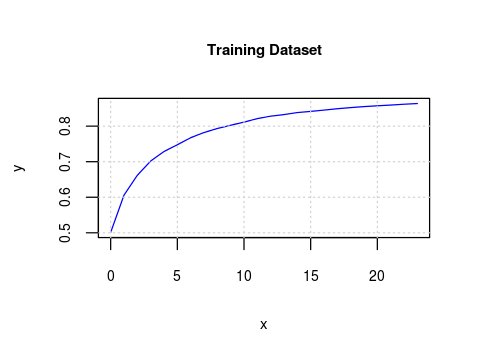

In [55]:
options(repr.plot.width=4, repr.plot.height=3)
plot(inp$x,inp$y,type='p',lwd=0,col='blue',cex.lab=0.75, cex.axis=0.7,xlab='x',ylab='y',main='Training Dataset',
     cex.main=0.75)
lines(inp$x,inp$y,col='blue')
grid()

## Section 1 : OLS (closed form analytic solution)

#### Looking at the above visualization, it is clear we are learning a non-linear function/ doing a non-linear curve fitting. Lets start with simple linear assumption and slow build complexity by using feature transformation. 

In [131]:
ols = lm(y ~ x,inp)
summary(ols)


Call:
lm(formula = y ~ x, data = inp)

Residuals:
        Min          1Q      Median          3Q         Max 
-0.15971571 -0.02197410  0.01146224  0.03575527  0.04422893 

Coefficients:
               Estimate  Std. Error  t value               Pr(>|t|)    
(Intercept) 0.660798742 0.019163354 34.48242 < 0.000000000000000222 ***
x           0.011049328 0.001427691  7.73930          0.00000010186 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04841536 on 22 degrees of freedom
Multiple R-squared:  0.731369,	Adjusted R-squared:  0.7191585 
F-statistic: 59.89673 on 1 and 22 DF,  p-value: 0.0000001018626


#### As seen from the model fit, model has an R-square of 71% indicates variance explained by the model which looks good. Also, both intercept and weight of x turns out to be significant (p-value < 0.05). Hence trying linear approximation y = c + mx gives y = 0.660799 + 0.011049 * x. Lets inspect actual vs. predicted curve

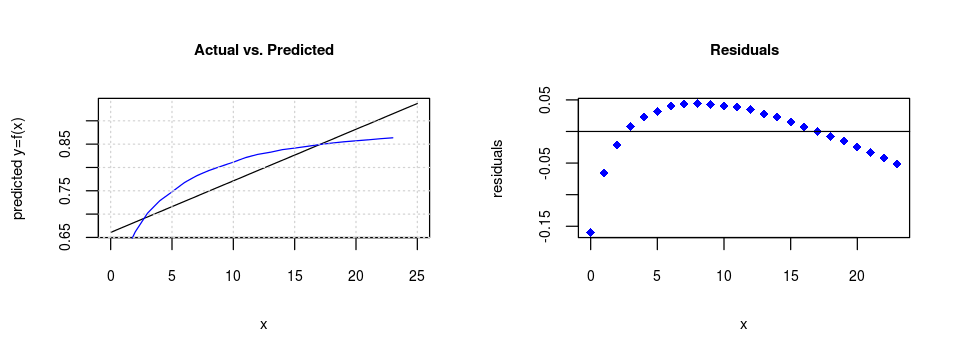

In [132]:
x = seq(0,25,0.1)
y = 0.660799 + 0.011049 * x
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,2))
res = resid(ols)
plot(x,y,type='p',lwd=0,col='blue',cex.lab=0.75, cex.axis=0.7,xlab='x',ylab='predicted y=f(x)',
     cex.main=0.75, main = 'Actual vs. Predicted')
lines(x,y,)
lines(inp$x,inp$y,col='blue')
grid()
x=seq(0,23,1)
plot(x,res,col='blue',pch=18,cex.lab=0.75, cex.axis=0.7,xlab='x',ylab='residuals',
     cex.main=0.75,main='Residuals')
abline(0, 0)  

#### Lets make this better by adding more variables, hey but wait we just got one variable x ? It turns out we could use feature transformation techniques to transform non-linear features to linear ones. for ex: we can define a new variable say x1 = x^2 and x2 = x^3 in addition to x so that y = f(x,x1,x2). Lets see how best we can fit the curve.

In [133]:
inp$x1 = inp$x*inp$x
inp$x2 = inp$x*inp$x*inp$x
ols1 = lm(y ~ x + x1 + x2,inp)
summary(ols1)


Call:
lm(formula = y ~ x + x1 + x2, data = inp)

Residuals:
         Min           1Q       Median           3Q          Max 
-0.040179129 -0.007064682  0.000897126  0.007967141  0.021601829 

Coefficients:
                  Estimate     Std. Error  t value               Pr(>|t|)    
(Intercept)  0.54126215590  0.00988514306 54.75512 < 0.000000000000000222 ***
x            0.05639946737  0.00380287897 14.83073     0.0000000000029662 ***
x1          -0.00358587936  0.00038905037 -9.21701     0.0000000122379907 ***
x2           0.00007689537  0.00001110802  6.92251     0.0000010094300830 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01404387 on 20 degrees of freedom
Multiple R-squared:  0.979452,	Adjusted R-squared:  0.9763698 
F-statistic: 317.7762 on 3 and 20 DF,  p-value: < 0.00000000000000022204


#### Great !!! We reduced error from 0.04 to 0.01 with R-square of 97%. Also all the features turns out to be significant. Lets see how this compares with y = f(x). Before we proceed, lets substitute back the features. y = 5.413e-01 + 5.640e-02*x -3.586e-03* x1 + 7.690e-05 * x2

#### Therefore, y = 5.413e-01 + 5.640e-02 * x -3.586e-03 * x^2 + 7.690e-05 * x^3

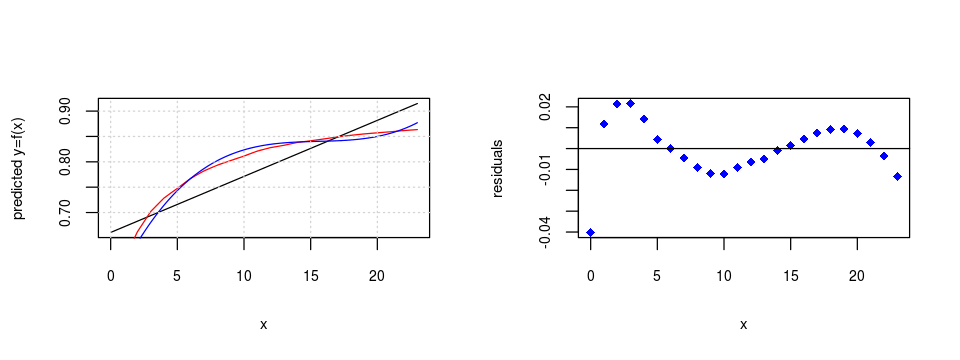

In [184]:
x = seq(0,23,0.1)
y = 0.660799 + 0.011049 * x
y1 = 5.413e-01 + 5.640e-02 * x -3.586e-03 * x^2 + 7.690e-05 * x^3
predicted_ols = y1
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,2))
res = resid(ols)
res1 = resid(ols1)
plot(x,y,type='p',lwd=0,col='blue',cex.lab=0.75, cex.axis=0.7,xlab='x',ylab='predicted y=f(x)',
cex.main=0.75)
lines(x,y,)
lines(inp$x,inp$y,col='red')
lines(x,y1,col='blue')
grid()
x=seq(0,23,1)
plot(x,res1,col='blue',pch=18,cex.lab=0.75, cex.axis=0.7,xlab='x',ylab='residuals',
cex.main=0.75)
abline(0, 0)  

#### Look at the red and blue line, red indicates actual while blue indicates predicted (based on ols1 which uses x,x1,x2). The predicted fit very closely with actual.

In [210]:
#Lets Calculate RMSE (root mean square error - so we can compare other models using this metric). There are 
#other error metrics one could look at, depeneding on the problem at hand. Check out kaggle for how they measure 
#error for various competitions
actual = inp$y
x = inp$x
y1 = 5.413e-01 + 5.640e-02 * x -3.586e-03 * x^2 + 7.690e-05 * x^3
predicted = y1
RMSE = (mean((actual - predicted)^2))^0.5 / nrow(inp)
RMSE

[1] 0.0005341788246

#### We just calculated RMSE (root mean square error - so we can compare other models using this metric). There are other error metrics one could look at, depeneding on the problem at hand. Check out kaggle for how they measure error for various competitions

## Section 2 : Gradient Descent (open form solution - iterative)

In [153]:
source("gradientdescent.R")

In [149]:
# Setting up for gradient descent
X <- matrix(c(inp$x,inp$x*inp$x), nrow=nrow(inp), byrow=FALSE)
y <- as.vector(inp$y)
f <- function(X,y,b) {
   (1/2)*norm(y-X%*%b,"F")^{2}
}
grad_f <- function(X,y,b) {
   t(X)%*%(X%*%b - y)
}
simple_ex <- gdescent(f,grad_f,X,y,alpha=0.01,iter=120000)

Minimum function value:
 0.00669805

Intercept:
 0.5821183

Coefficient(s):
 0.0325076650 -0.0009329719



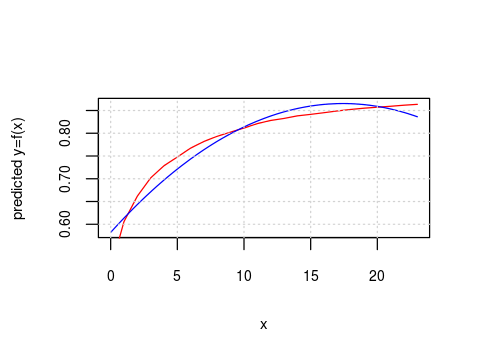

In [201]:
library(ggplot2)
#options(repr.plot.width=12, repr.plot.height=3)
#par(mfrow=c(1,3))
#plot_loss(simple_ex)
#plot_iterates(simple_ex)
#plot_gradient(simple_ex)
x = seq(0,23,0.1)
predicted = 0.5821183 +(0.0325076650*x) -(0.0009329719*(x*x))
predicted_gd = predicted
options(repr.plot.width=4, repr.plot.height=3)
plot(x,predicted,type='p',lwd=0,col='blue',cex.lab=0.75, cex.axis=0.7,xlab='x',ylab='predicted y=f(x)',
cex.main=0.75)
lines(inp$x,inp$y,col='red')
lines(x,predicted,col= "blue")
grid()

In [172]:
predicted = 0.5821183 +(0.0325076650*inp$x) -(0.0009329719*(inp$x*inp$x))
actual = inp$y
RMSE = (mean((actual - predicted)^2))^0.5 / nrow(inp)
RMSE

[1] 0.0009844016455

## Section 3: Neural Networks 

In [6]:
library(nnet)
library(neuralnet)

#### Lets normalize data, as the neural network uses gradient descent to learn the back prop. weights. It is usually seen normalizing to [0,1] better than [-1,1]. I am skipping it for now, but something to keep in mind while trying for real world problems. We are using 3 layer 3 nodes in the hidden layer

In [204]:
nn <- neuralnet(inp$y ~ inp$x,train,hidden=c(3,3),linear.output=T)

In [230]:
plot.nn(nn,file="nn.png")
dev.off()

dev.new(): using pdf(file="Rplots173.pdf")


pdf 
  2

In [242]:
nn
#jj <- readJPEG("nnet_vis_1.jpg",native=TRUE)
#plot(0:1,0:1,type="n",ann=FALSE,axes=FALSE)
#rasterImage(jj,0,0,1,1)

Call: neuralnet(formula = inp$y ~ inp$x, data = train, hidden = c(3,     3), linear.output = T)

1 repetition was calculated.

            Error Reached Threshold Steps
1 0.0005345835713    0.008088818091    68


![Image of Yaktocat](Documents/Projects/Product/nnet_vis_1.jpg)

In [207]:
#RMSE
actual = inp$y
predicted = compute(nn,inp$x)$net.result
RMSE = (mean((actual - predicted)^2))^0.5 / nrow(inp)
RMSE

[1] 0.00027810317

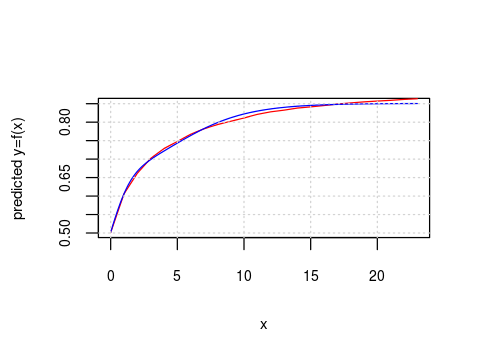

In [218]:
x = seq(0,23,0.1)
predicted = compute(nn,x)$net.result
predicted_nn = predicted
options(repr.plot.width=4, repr.plot.height=3)
plot(x,predicted,type='p',lwd=0,col='blue',cex.lab=0.75, cex.axis=0.7,xlab='x',ylab='predicted y=f(x)',
cex.main=0.75)
lines(inp$x,inp$y,col='red')
lines(x,predicted,col= "blue")
grid()

## Section 4 : Comparing the 3 models

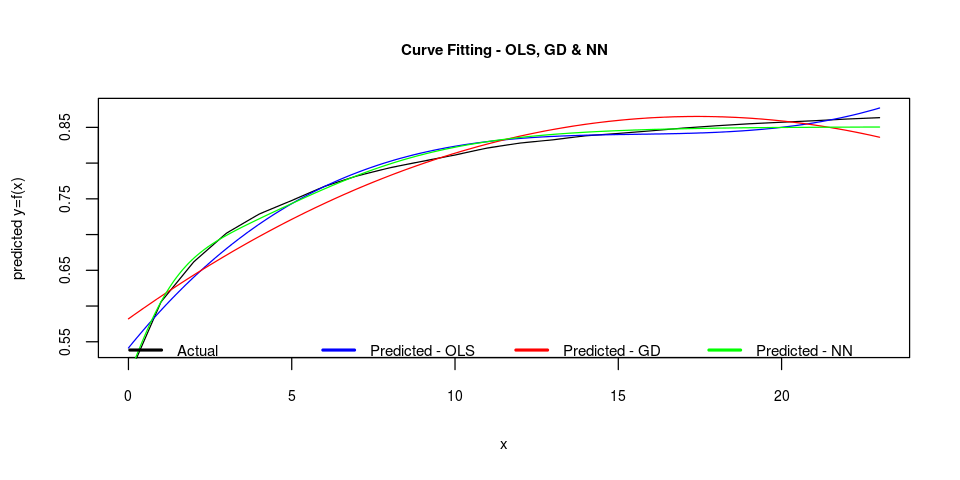

In [274]:
x = seq(0,23,0.1)
options(repr.plot.width=8, repr.plot.height=4)
plot(x,predicted_ols,type='o',lwd=0,col='blue',cex.lab=0.75, cex.axis=0.7,xlab='x',ylab='predicted y=f(x)',main="Curve Fitting - OLS, GD & NN"
,cex.main=0.75)
lines(inp$x,inp$y,col='black')
lines(x,predicted_ols,col= "blue")
lines(x,predicted_gd,col= "red")
lines(x,predicted_nn,col= "green")
legend('bottom',cex=0.75,c("Actual","Predicted - OLS","Predicted - GD","Predicted - NN"),horiz=TRUE,bg='lightblue',pt.cex=0.75,bty='n',lty=c(1,1), lwd=c(2.5,2.5),col=c("black","blue","red","green")) 